In [ ]:
from zipfile import ZipFile
file_name = "emotion.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Đã giải nén thành công!')

Đã giải nén thành công!


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:

train_data_dir='/content/emotion/train/'
validation_data_dir='/content/emotion/test/'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, shear_range=0.25,
                                   zoom_range=0.25, horizontal_flip=True, fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                      train_data_dir,
                                      color_mode='grayscale',
                                      target_size=(48,48),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                      validation_data_dir,
                                      color_mode='grayscale',
                                      target_size=(48,48),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


train_path = "/content/emotion/train"
test_path = "/content/emotion/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=100,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

model.save('emotion_detection_model_100epochs.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
score = model.evaluate(validation_generator, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.050581455230713
Test accuracy: 0.6039286851882935


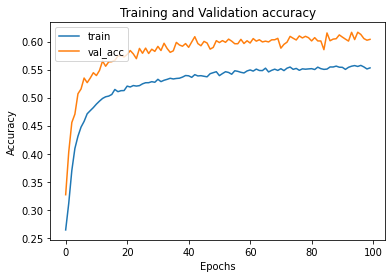

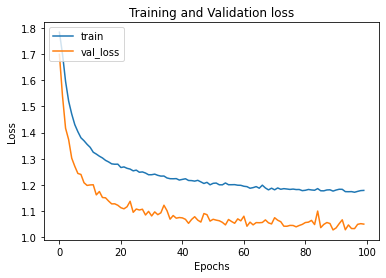

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val_acc'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','val_loss'], loc = 'upper left')
plt.show()